In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import math
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima

import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
from scipy import signal
from utils import adf_test, kpss_test, draw_acf_pacf, timeseries_evaluation_metrics_func, Augmented_Dickey_Fuller_Test_func, inverse_diff

warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv('serieWind109.csv', sep=';')

In [21]:
df['timewind'] = pd.to_datetime(df['timewind'])

In [22]:
df = df.set_index('timewind')

In [23]:
df = df[['ts50_windspeed']]

In [24]:
train = df[(df.index >= '2015-02-01 00:00:00' ) & (df.index < '2015-03-30 19:00:00') ]
test =  df[df.index >= '2015-03-30 19:00:00' ]

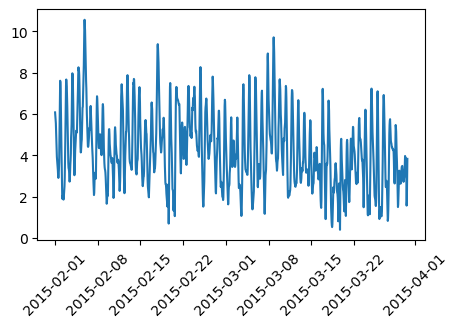

In [25]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(train.ts50_windspeed)
plt.xticks( rotation=45 )
plt.show()

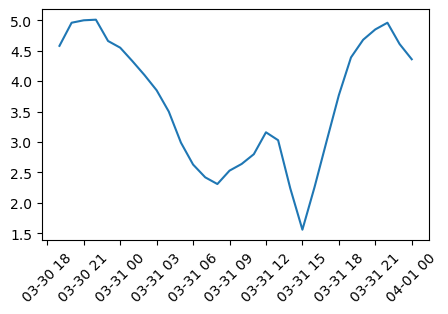

In [26]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.plot(test.ts50_windspeed)
plt.xticks( rotation=45 )
plt.show()

In [27]:
print(f"Train min_date: {train.index.min()} max_date: {train.index.max()}")
print(f"Test min_date: {test.index.min()} max_date: {test.index.max()}")

Train min_date: 2015-02-01 00:00:00 max_date: 2015-03-30 18:00:00
Test min_date: 2015-03-30 19:00:00 max_date: 2015-04-01 00:00:00


In [28]:
adf_test(train.ts50_windspeed)

Results of Dickey-Fuller Test:
Test Statistic                   -4.590904
p-value                           0.000134
#Lags Used                       23.000000
Number of Observations Used    1363.000000
Critical Value (1%)              -3.435157
Critical Value (5%)              -2.863663
Critical Value (10%)             -2.567900
dtype: float64


In [29]:
kpss_test(train.ts50_windspeed)

Results of KPSS Test:
Test Statistic            1.889502
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


In [30]:
train_diff  = train.diff()

In [31]:
train_diff.dropna(inplace=True)

In [32]:
adf_test(train_diff.ts50_windspeed)

Results of Dickey-Fuller Test:
Test Statistic                -1.110016e+01
p-value                        3.883372e-20
#Lags Used                     2.400000e+01
Number of Observations Used    1.361000e+03
Critical Value (1%)           -3.435164e+00
Critical Value (5%)           -2.863666e+00
Critical Value (10%)          -2.567902e+00
dtype: float64


In [33]:
kpss_test(train_diff.ts50_windspeed)

Results of KPSS Test:
Test Statistic            0.004997
p-value                   0.100000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


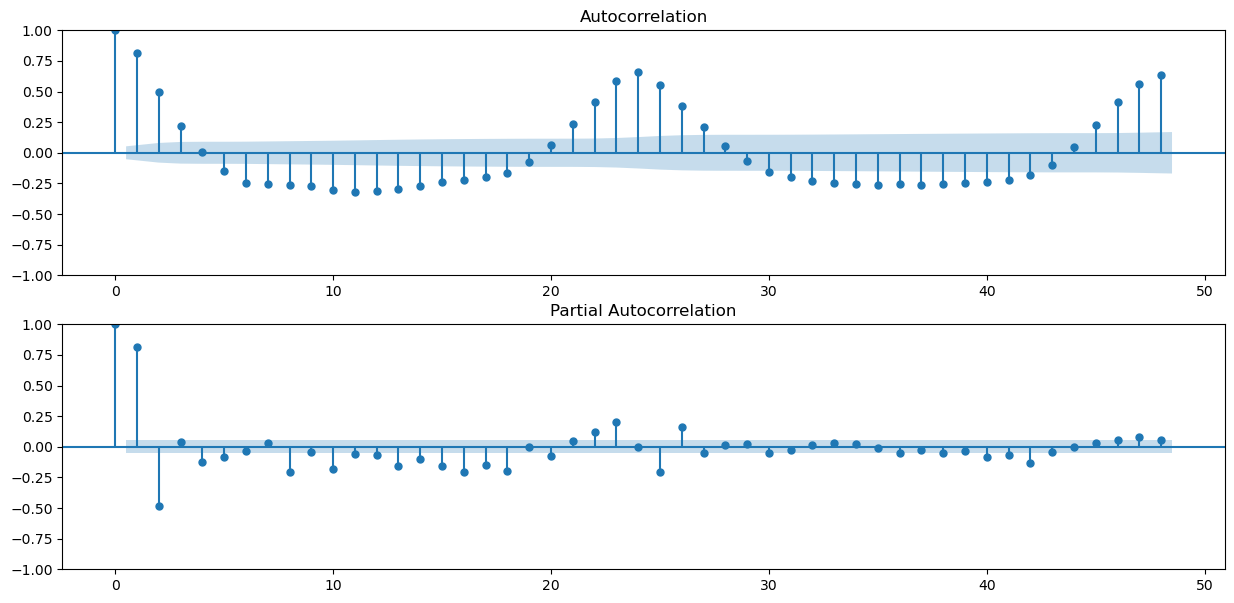

In [34]:
draw_acf_pacf(train_diff.ts50_windspeed.values, 48)

# SARIMA

Parametros a buscar

- p: 1 a 7
- q: 1 a 7
- d: -
- P: 1 a 7
- Q: 1 a 7
- D: -

- 12 - 1/2 dia
- 24 - diario
- 168 - semanal
- 720 - mes
- 4320 - semestral
- 8640 - anual

In [35]:
p, q, P, Q = [7,7,7,7]

SARIMA para valor estacional:  8
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[8] intercept   : AIC=220.893, Time=0.80 sec
 ARIMA(0,0,0)(0,0,0)[8] intercept   : AIC=2062.465, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[8] intercept   : AIC=553.938, Time=0.42 sec
 ARIMA(0,0,1)(0,0,1)[8] intercept   : AIC=733.866, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[8]             : AIC=2060.479, Time=0.04 sec
 ARIMA(1,0,1)(0,0,1)[8] intercept   : AIC=218.903, Time=0.45 sec
 ARIMA(1,0,1)(0,0,0)[8] intercept   : AIC=227.322, Time=0.25 sec
 ARIMA(1,0,1)(0,0,2)[8] intercept   : AIC=212.928, Time=0.92 sec
 ARIMA(1,0,1)(1,0,2)[8] intercept   : AIC=152.188, Time=1.59 sec
 ARIMA(1,0,1)(2,0,2)[8] intercept   : AIC=inf, Time=2.78 sec
 ARIMA(1,0,1)(1,0,3)[8] intercept   : AIC=-36.949, Time=3.11 sec
 ARIMA(1,0,1)(0,0,3)[8] intercept   : AIC=-34.371, Time=2.13 sec
 ARIMA(1,0,1)(2,0,3)[8] intercept   : AIC=inf, Time=5.94 sec
 ARIMA(1,0,1)(1,0,4)[8] intercept   : AIC=-37.385, Time=8.24 sec
 ARIMA(1,0,1)(0,0,4)

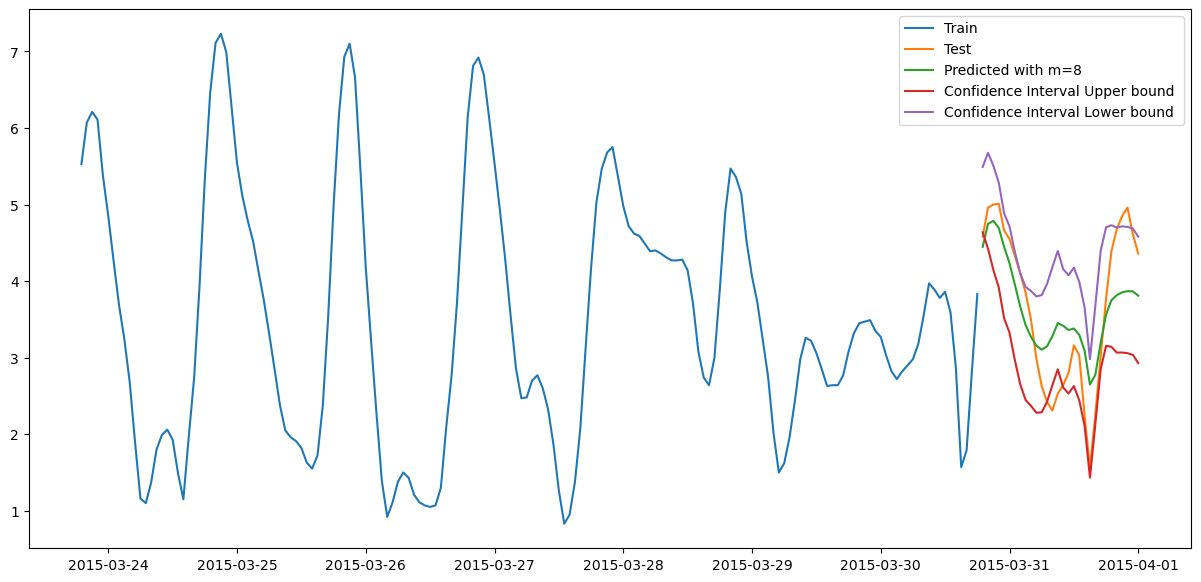

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 8


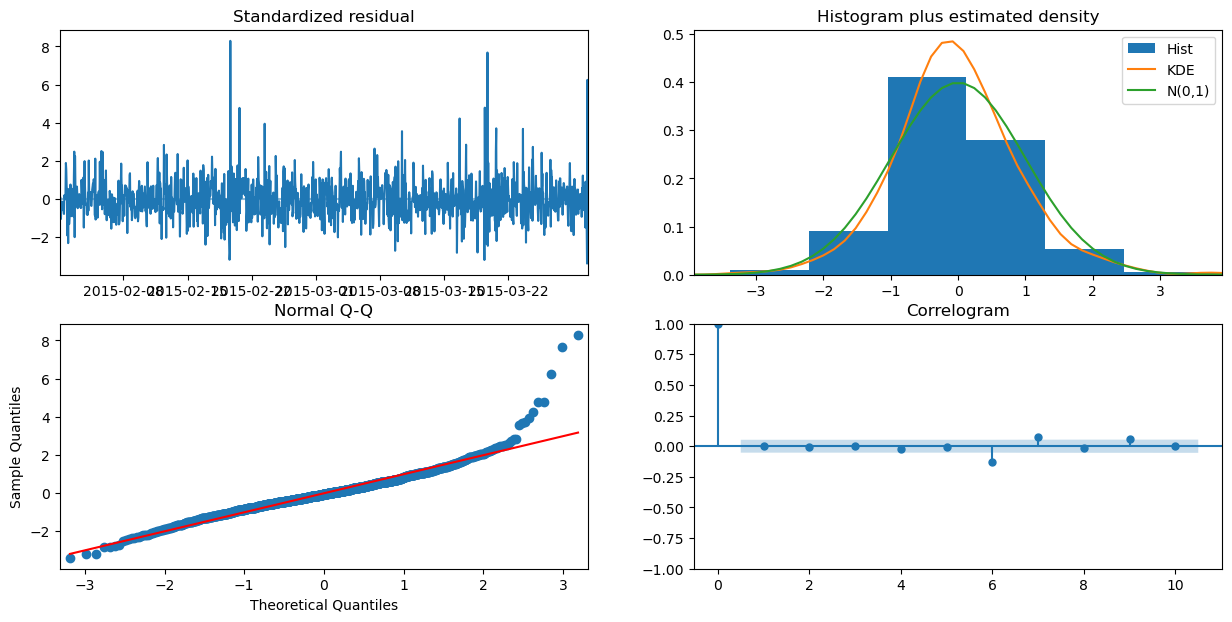

----------------------------------------------------------------------------------------------------
SARIMA para valor estacional:  12
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2062.465, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=550.647, Time=0.51 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=767.357, Time=0.79 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2060.479, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=552.051, Time=0.09 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=112.085, Time=2.22 sec
 ARIMA(1,0,0)(3,0,0)[12] intercept   : AIC=112.088, Time=5.88 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=104.463, Time=4.23 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.69 sec
 ARIMA(1,0,0)(3,0,1)[12] intercept   : AIC=inf, Time=10.86 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=5.00 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=

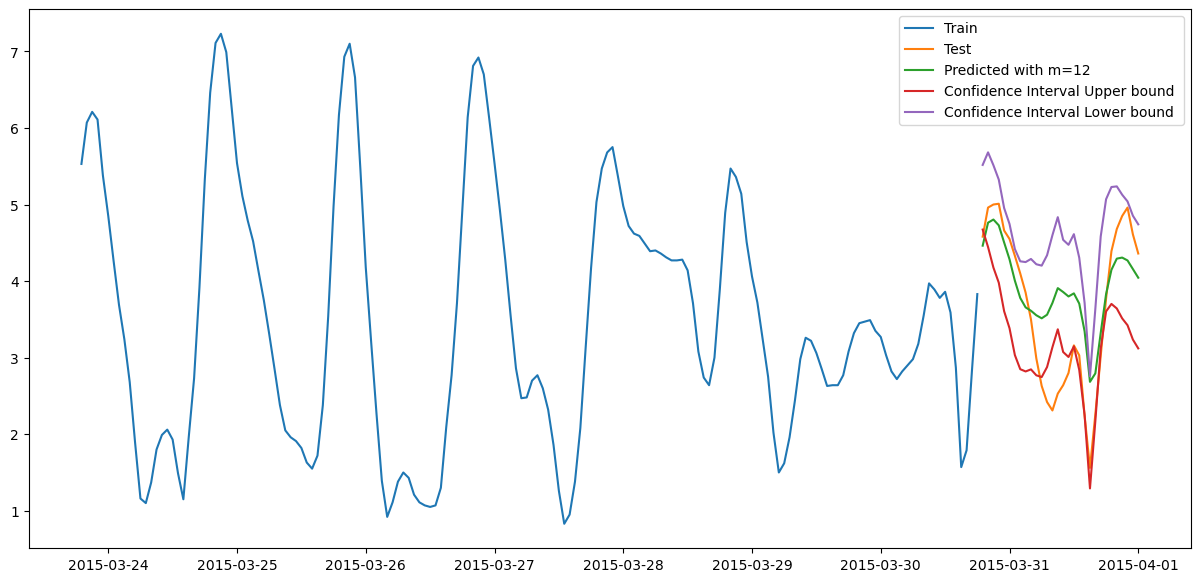

----------------------------------------------------------------------------------------------------
 Diagnostic plot for Seasonal value m = 12


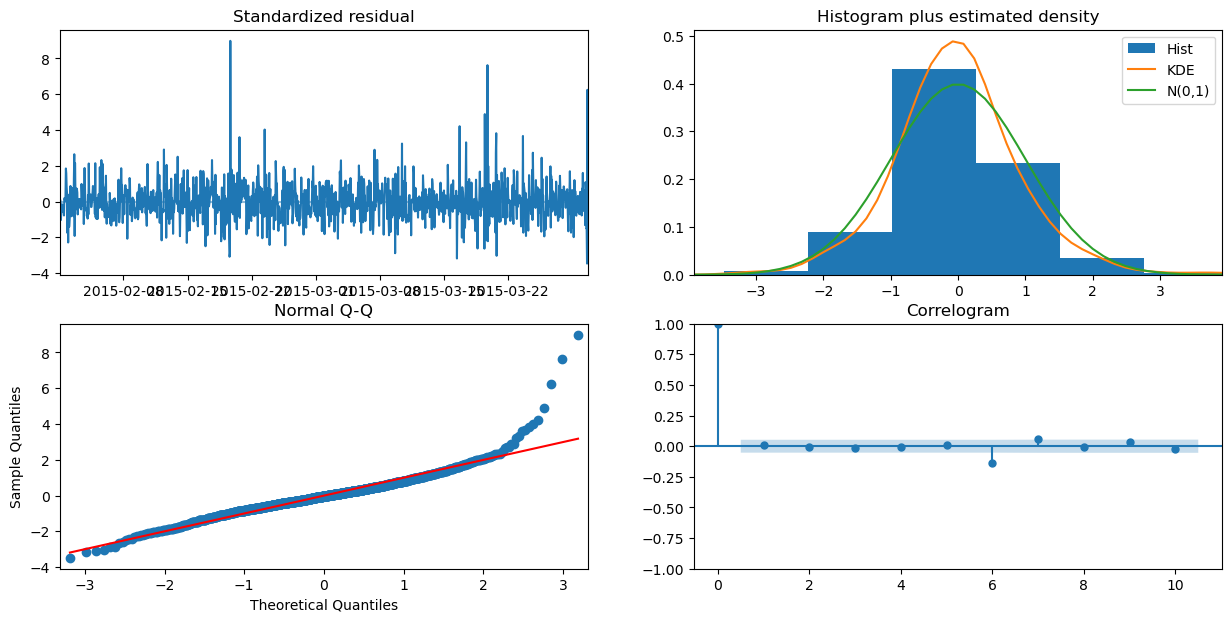

----------------------------------------------------------------------------------------------------
SARIMA para valor estacional:  24
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[24] intercept   : AIC=inf, Time=3.60 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=2062.465, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=112.098, Time=1.17 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=445.770, Time=2.33 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=2060.479, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=552.051, Time=0.09 sec
 ARIMA(1,0,0)(2,0,0)[24] intercept   : AIC=36.276, Time=5.69 sec
 ARIMA(1,0,0)(3,0,0)[24] intercept   : AIC=inf, Time=20.04 sec
 ARIMA(1,0,0)(2,0,1)[24] intercept   : AIC=inf, Time=14.61 sec
 ARIMA(1,0,0)(1,0,1)[24] intercept   : AIC=inf, Time=3.99 sec
 ARIMA(1,0,0)(3,0,1)[24] intercept   : AIC=inf, Time=38.80 sec
 ARIMA(0,0,0)(2,0,0)[24] intercept   : AIC=inf, Time=4.91 sec
 ARIMA(2,0,0)(2,0,0)[24] intercept   : AIC=-271.88

In [ ]:
for m in [8, 12, 24]:
    print("="*100)
    print("SARIMA para valor estacional: ", m)
    stepwise_model = auto_arima(train_diff.ts50_windspeed, start_p=1, start_q=1,
                   max_p=p, max_q=1, seasonal=True, start_P=1, start_Q=1, max_P=P, max_D=7, max_Q=Q, m=m,
                   d=None, D=None, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
    print(f'Model summary for  m = {str(m)}')
    print("-"*100)
    print(f'Model summary for  m = {str(m)}')
    print("-"*100)
    stepwise_model.summary()
    forecast ,conf_int= stepwise_model.predict(n_periods=30,return_conf_int=True)
    df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
    df_conf["new_index"] = test.index
    df_conf = df_conf.set_index("new_index")
    forecast = pd.DataFrame(forecast, columns=['ts50_windspeed'])
    forecast = inverse_diff(train, forecast)
    forecast["new_index"] = test.index
    forecast = forecast.set_index("new_index")
    timeseries_evaluation_metrics_func(test, forecast.iloc[:,[1]])
    df_conf['Upper_bound'] = df_conf['Upper_bound'] + forecast.ts50_windspeed_1st_inv_diff
    df_conf['Lower_bound'] = df_conf['Lower_bound'] + forecast.ts50_windspeed_1st_inv_diff     
    import matplotlib.pyplot as plt
    get_ipython().run_line_magic('matplotlib', 'inline')
    plt.rcParams["figure.figsize"] = [15, 7]
    plt.plot(train.tail(24*7), label='Train ')
    plt.plot(test, label='Test ')
    plt.plot(forecast.ts50_windspeed_1st_inv_diff, label=f'Predicted with m={str(m)} ')
    plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
    plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
    plt.legend(loc='best')
    plt.show()
    print("-"*100)
    print(f' Diagnostic plot for Seasonal value m = {str(m)}')
    display(stepwise_model.plot_diagnostics());
    print("-"*100)